In [1]:
import sys
sys.path.append('/home/bart/Documents/Msc/scripts/PMP_importlib')
from dataHoarder import importFiles
import measurement as ms

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
def fileparser(filename):
    # remove the extension
    path_and_name, _ = filename.split('.')
    # get the name of the actual file, forgetting its path
    name = path_and_name.split('/')[-1]
    # get the parameters from the filename
    doping, anneal, time, etched = name.split('_')
    # pack them in a dict
    rv = {'time' : time,
          'etched': etched}    
    # and return the dict
    return rv    

In [4]:
base = 'r24_asdep'
times = ['30S','1M','2M','3M','4M','5M']
files = [base + '_' + time for time in times]
files = [file + '_' + etched for file in files for etched in ['before','after']]
files = [file + '.SEsnap' for file in files]
files = ['datafiles/' + file for file in files]
files

['datafiles/r24_asdep_30S_before.SEsnap',
 'datafiles/r24_asdep_30S_after.SEsnap',
 'datafiles/r24_asdep_1M_before.SEsnap',
 'datafiles/r24_asdep_1M_after.SEsnap',
 'datafiles/r24_asdep_2M_before.SEsnap',
 'datafiles/r24_asdep_2M_after.SEsnap',
 'datafiles/r24_asdep_3M_before.SEsnap',
 'datafiles/r24_asdep_3M_after.SEsnap',
 'datafiles/r24_asdep_4M_before.SEsnap',
 'datafiles/r24_asdep_4M_after.SEsnap',
 'datafiles/r24_asdep_5M_before.SEsnap',
 'datafiles/r24_asdep_5M_after.SEsnap']

In [5]:
df = importFiles(files, ms.SEMeasurement, fileparser)

/home/bart/Documents/Msc/scripts/PMP_importlib/dataHoarder.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({**metadata, **data}, ignore_index=True)
/home/bart/Documents/Msc/scripts/PMP_importlib/dataHoarder.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({**metadata, **data}, ignore_index=True)
/home/bart/Documents/Msc/scripts/PMP_importlib/dataHoarder.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({**metadata, **data}, ignore_index=True)
/home/bart/Documents/Msc/scripts/PMP_importlib/dataHoarder.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({**metadata, **da

In [6]:
df = df.rename(columns =
          {'Thickness # 1': 'INTR',
           'Thickness # 2': 'SiO2',
           'Thickness # 3': 'ZnO',
           'Thickness # 4': 'AlOx'})

In [7]:
df = df[['etched','time','ZnO','AlOx','Roughness']]

In [8]:
df['time_s'] = df.time.map({'30S': 30,
                            '1M' : 60,
                            '2M' : 120,
                            '3M' : 180,
                            '4M' : 240,
                            '5M' : 300})
df

,etched,time,ZnO,AlOx,Roughness,time_s
0,before,30S,883.76,334.69,151.19,30
1,after,30S,890.83,202.96,70.21,30
2,before,1M,899.18,322.02,143.84,60
3,after,1M,898.47,96.45,0.00,60
4,before,2M,893.33,309.13,151.46,120
5,after,2M,896.64,184.76,81.63,120
6,before,3M,885.76,339.04,160.44,180
7,after,3M,881.63,97.26,10.00,180
8,before,4M,901.73,318.44,144.56,240
9,after,4M,892.83,77.36,0.00,240


In [9]:
df['tot_height'] = df.ZnO + df.AlOx 

<AxesSubplot:xlabel='time_s'>

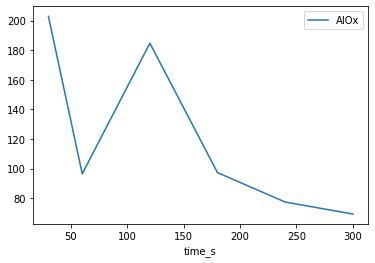

In [10]:
df.loc[df.etched == 'after'].plot(x='time_s',y='AlOx')

Text(0.5, 1.0, 'Before etching')

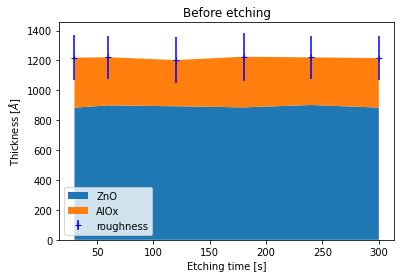

In [24]:
data = df.loc[df.etched == 'before']
plt.stackplot(data.time_s, data.ZnO, data.AlOx, labels=['ZnO','AlOx'])
plt.errorbar(data.time_s, data.tot_height, yerr=data.Roughness, fmt='b+', label='roughness')
plt.legend()
plt.xlabel('Etching time [s]')
plt.ylabel('Thickness [$\AA$]')
plt.title('Before etching')

Text(0.5, 1.0, 'After etching')

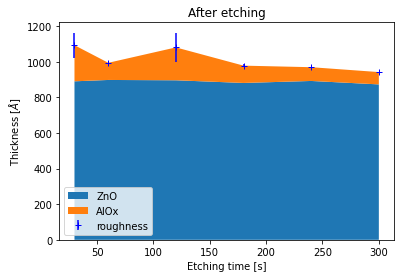

In [25]:
data = df.loc[df.etched == 'after']
plt.stackplot(data.time_s, data.ZnO, data.AlOx, labels=['ZnO','AlOx'])
plt.errorbar(data.time_s, data.tot_height, yerr=data.Roughness, fmt='b+', label='roughness')
plt.legend()
plt.xlabel('Etching time [s]')
plt.ylabel('Thickness [$\AA$]')
plt.title('After etching')

<AxesSubplot:>

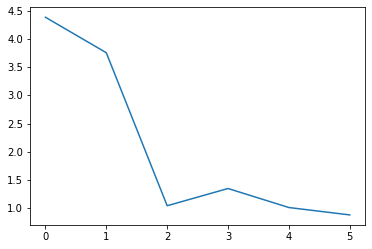

In [47]:
idf = (df
       .pivot(index = 'time_s', values = ['AlOx', 'ZnO'], columns = 'etched')
       .reset_index()
      )
dA = idf.AlOx.before - idf.AlOx.after
dZ = idf.ZnO.before  - idf.ZnO.after
EPC = dA/idf.time_s
#dA.plot()
#dZ.plot()
EPC.plot()

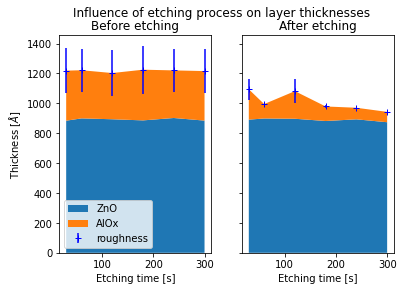

In [41]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, sharey = True)

data = df.loc[df.etched == 'before']
ax_before.stackplot(data.time_s, data.ZnO, data.AlOx, labels=['ZnO','AlOx'])
ax_before.errorbar(data.time_s, data.tot_height, yerr=data.Roughness, fmt='b+', label='roughness')
ax_before.legend()
ax_before.set_xlabel('Etching time [s]')
ax_before.set_ylabel('Thickness [$\AA$]')
ax_before.set_title('Before etching')

data = df.loc[df.etched == 'after']
ax_after.stackplot(data.time_s, data.ZnO, data.AlOx, labels=['ZnO','AlOx'])
ax_after.errorbar(data.time_s, data.tot_height, yerr=data.Roughness, fmt='b+', label='roughness')

ax_after.set_xlabel('Etching time [s]')
ax_after.set_title('After etching')

fig.suptitle('Influence of etching process on layer thicknesses')

imagefolder = '../../images/'
fig.savefig(imagefolder + 'etching_thicknesses.png', dpi = 300)